# I. Introduction

## Problem

### Background

## 🧠 What is HR Analytics?

**HR Analytics** is the process of analyzing human resources data to improve organizational performance. It involves examining talent, current employees, and job candidates to generate objective, measurable insights into how human capital contributes to organizational success.

Organizational performance is strongly tied to the **quality and stability of its workforce**. One of the biggest challenges in HR management is **employee attrition**, which brings significant negative impacts such as:

- 💸 **Training costs** and onboarding time for new hires  
- 🧠 Loss of **experience and productivity**  
- 📉 Decline in **team morale and overall performance**  
- 💼 Disruption to a stable **working environment**


## 🔍 Why is HR Analytics Important?

By leveraging HR analytics, organizations can:

- 📊 Identify **patterns among employees at risk of leaving**  
- 🤝 Take **proactive and human-centered actions**, such as informal check-ins or stay interviews  
- 🛠️ Perform **root cause analysis** and implement systemic improvements like career development paths, role rotation, or reward systems

> With this approach, HR transforms from being reactive to turnover into a **strategic partner** for improving retention and organizational productivity.

### 🧩 Problem Statement

Develop a classification model to predict employee attrition using HR analytics. The model is considered successful if it can detect at least **80% of employees who leave** (recall ≥ 0.80), enabling HR to make **proactive, data-driven decisions**. The project is expected to be completed within a **one-week timeline**, with a target deadline of **June 18, 2025**.

### 🎯 Evaluation Metric
The primary evaluation metric used is **Recall**, as the main objective is to detect employees who are likely to leave.  
Recall is the most suitable metric in this context because:

- It focuses on minimizing **False Negatives** (i.e., employees predicted to stay but actually leave).  
- High recall ensures **better coverage of at-risk employees**, which is crucial for retention strategies.

## Dataset

### Reference

File    : dataset.csv

Source  : https://www.kaggle.com/code/faressayah/ibm-hr-analytics-employee-attrition-performance

### Description

| **Column** | **Type** | **Description** |
|------------|----------|-----------------|
| Age | Numeric | Employee’s age |
| Attrition | Categorical (nominal) | Whether the employee left the company |
| BusinessTravel | Categorical (nominal) | Frequency of business travel |
| DailyRate | Numeric | Daily internal rate or cost estimate |
| Department | Categorical (nominal) | Department the employee works in |
| DistanceFromHome | Numeric | Distance from home to office |
| Education | Categorical (ordinal) | Education level (1–5): 1=High School, 5=Doctorate |
| EducationField | Categorical (nominal) | Field of education |
| EmployeeNumber | Numeric (ID) | Unique employee ID |
| EnvironmentSatisfaction | Categorical (ordinal) | Satisfaction with the work environment (1–4) |
| Gender | Categorical (nominal) | Gender (Female, Male) |
| HourlyRate | Numeric | Hourly rate or estimate |
| JobInvolvement | Categorical (ordinal) | Level of job involvement (1–4) |
| JobLevel | Categorical (ordinal) | Job seniority level (1–5) |
| JobRole | Categorical (nominal) | Job role title (e.g., Sales Executive, Manager) |
| JobSatisfaction | Categorical (ordinal) | Job satisfaction (1–4) |
| MaritalStatus | Categorical (nominal) | Marital status (Single, Married, Divorced) |
| MonthlyIncome | Numeric | Monthly salary |
| MonthlyRate | Numeric | Monthly project cost allocation |
| NumCompaniesWorked | Numeric | Number of previous employers |
| OverTime | Categorical (nominal) | Whether the employee works overtime |
| Over18 | Categorical | Whether employee is over 18 (Y/N) |
| PercentSalaryHike | Numeric | Percentage of last salary increase |
| PerformanceRating | Categorical (ordinal) | Performance rating (3=Good, 4=Excellent) |
| RelationshipSatisfaction | Categorical (ordinal) | Satisfaction with work relationships (1–4) |
| StockOptionLevel | Categorical (ordinal) | Stock option level (0–3) |
| TotalWorkingYears | Numeric | Total years of work experience |
| TrainingTimesLastYear | Numeric | Number of trainings in the past year |
| WorkLifeBalance | Categorical (ordinal) | Work-life balance score (1–4) |
| YearsAtCompany | Numeric | Years spent at the current company |
| YearsInCurrentRole | Numeric | Years in current role |
| YearsSinceLastPromotion | Numeric | Years since last promotion |
| YearsWithCurrManager | Numeric | Years working with the current manager |

# II. Import Library

All libraries that will be used are collected in this section

In [1]:
# Import all libraries that will be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import recall_score, roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# III. Data Loading

Data loading is the process of loading data, cleaning it, and understanding the structure and general information about the data.

In [2]:
# Process of loading data into a dataframe df
df = pd.read_csv('dataset.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Displays a summary of dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Structurally there are no data type errors, there is no None data, Column naming uses Pascal case

In [4]:
# Displays statistical descriptions of numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


It is necessary to pay attention to several columns that have a variation of 0 because they contain only one data (EmployeeCount, StandardHours), a small min max range indicates that the data is not numeric, but is categorical such as (Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, WorkLifeBalance), the value needs to be seen again in feature engineering to cross check again.

In [5]:
# Categorical data description
df.describe(include=['O']).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


Attrition here forgets the predicted label, all data here is strings that are certain to be categorical data. Over18 has only one data type

In [6]:
# Duplicate the dataframe as a data backup
df_copy = df.copy()

# IV Exploratory Data Analysis

Here we will find patterns in data through visualization and reveal hidden secrets through graphs, analysis, and diagrams.

**Data without analysis is just noise.**

## Is income the main reason for someone to leave?

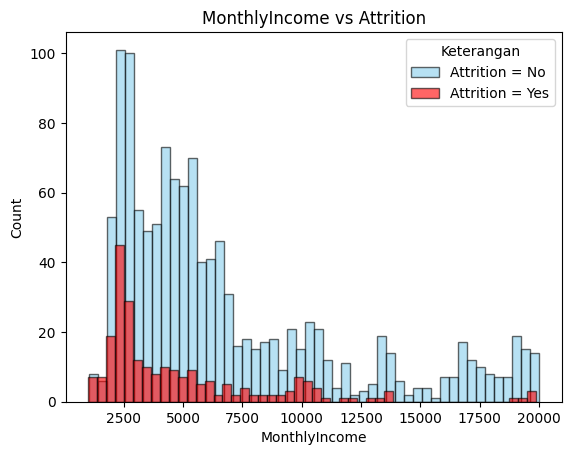

In [7]:
# Table filter
attrition_yes = df[df['Attrition'] == 'Yes']['MonthlyIncome']
attrition_no = df[df['Attrition'] == 'No']['MonthlyIncome']

# Creating a histogram visualization
plt.hist(attrition_no, bins=50, color='skyblue', edgecolor='black', alpha=0.6, label='Attrition = No')
plt.hist(attrition_yes, bins=50, color='red', edgecolor='black', alpha=0.6, label='Attrition = Yes')
plt.title('MonthlyIncome vs Attrition')
plt.xlabel('MonthlyIncome')
plt.ylabel('Count')
plt.legend(title='Keterangan')
plt.show()

**Analysis:**  Employees with a **monthly income below 6,000** tend to have a **higher attrition rate**, likely due to the pursuit of better-paying opportunities. This suggests that **low-income employees are more likely to leave** for financial reasons.

Interestingly, there is a **small spike in attrition around the 10,000 mark**, which may indicate that **mid-level earners** are also seeking to improve their standard of living or aiming for higher career advancement.

> This insight highlights the importance of income satisfaction as a potential driver of employee turnover.


## Does a bad work environment affect employee turnover?

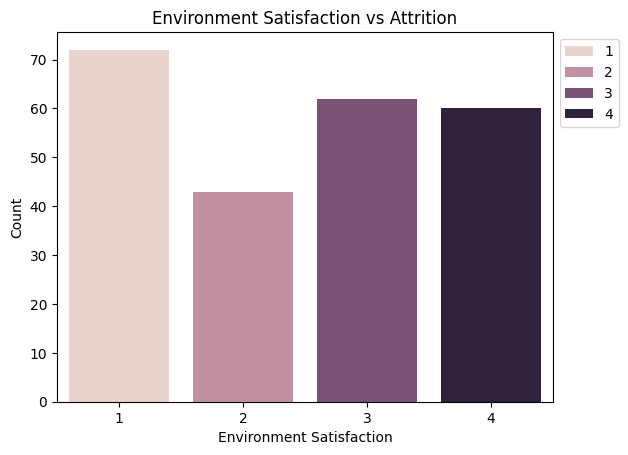

In [8]:
# Filter and count the amount of data
envi = df[df['Attrition'] == 'Yes']
envi_count = envi.groupby('EnvironmentSatisfaction')['Attrition'].count().reset_index(name='count_enviroment')

# Creating a barplot visualization
sns.barplot(data=envi_count, x='EnvironmentSatisfaction', y='count_enviroment', hue='EnvironmentSatisfaction')
plt.title('Environment Satisfaction vs Attrition')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Environment Satisfaction')
plt.ylabel('Count')
plt.show()

information :
- Low : 1
- Medium : 2
- High : 3
- Very High : 4

**Analysis:**  Approximately **70 employees who left the company reported low environment satisfaction**, indicating that a **poor work environment** can be a strong factor in employee turnover.

Interestingly, attrition is also observed among those who reported **high or very high satisfaction** with their environment. This suggests that even in **comfortable or overly stable environments**, some employees may leave in search of **new challenges or growth opportunities**.

> A good environment is important, but not always enough to retain employees who seek continuous development or stimulation.


## Which department does the most people leave?

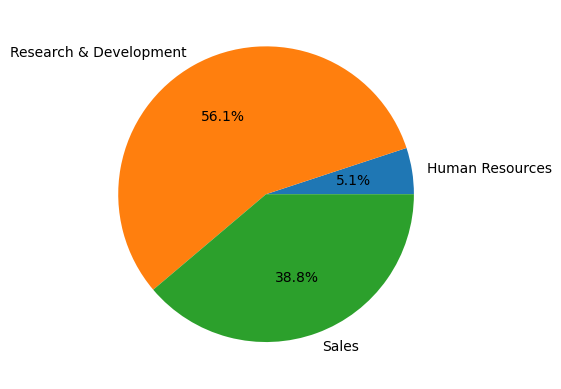

In [9]:
# Filter and count the amount of data
department = df[df['Attrition'] == 'Yes']
department_count = department.groupby('Department')['Attrition'].count().reset_index(name='count_departement')

# Creating a barplot visualization
plt.pie(x = department_count['count_departement'], labels =department_count['Department'], autopct='%1.1f%%') 
plt.show()

**Analysis:**  Unfortunately, the dataset includes only **three departments** for analysis. However, among employees who left the company, the **highest attrition rates are observed in the R&D and Sales departments**. This could be due to the **high-pressure nature of target-driven roles** in these areas, leading to increased stress and burnout.

In contrast, the **Human Resources department** shows the **lowest attrition**, likely because it primarily involves **administrative tasks** with relatively lower work intensity and performance pressure.

> This suggests that job nature and workload significantly influence employee retention across departments.


## How does the current work duration impact employee turnover?

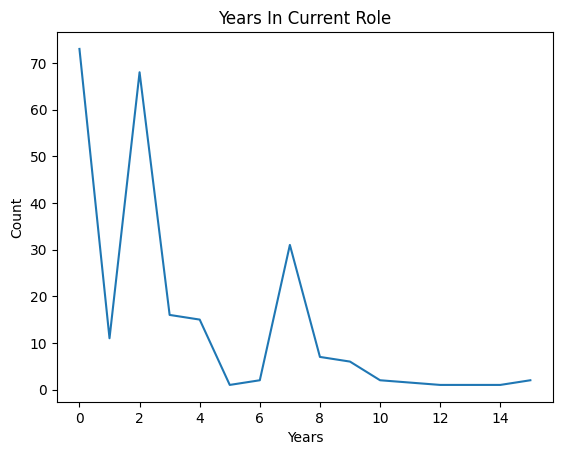

In [10]:
# Filter and count the amount of data
duration = df[df['Attrition'] == 'Yes']
duration_count = duration.groupby('YearsInCurrentRole')['Attrition'].count().reset_index(name='Count_YearsInCurrentRole')

# Visualization with lineplot
sns.lineplot(x=duration_count['YearsInCurrentRole'], y=duration_count['Count_YearsInCurrentRole'])
plt.title('Years In Current Role')
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

**Analysis:**  Employees with **less than 1 year of tenure** show a **high attrition rate**, likely due to the challenges of onboarding and adjusting to the company culture. This period is often marked by uncertainty and potential **early mismatch** between employee expectations and the actual work environment.

Attrition then **decreases after the first year**, but **rises again around the second year**, possibly due to **one-year contract expirations** or reassessments of long-term fit.

After the second year, attrition tends to **decline steadily**, indicating growing stability and job satisfaction. However, there is **another spike around year 7**, likely because **experienced employees begin seeking new opportunities** for growth or advancement outside the company.

> Employee attrition appears to follow distinct phases: early mismatch, contract-based exits, stabilization, and mid-career mobility.


## Do people resign because of the long distance from home?

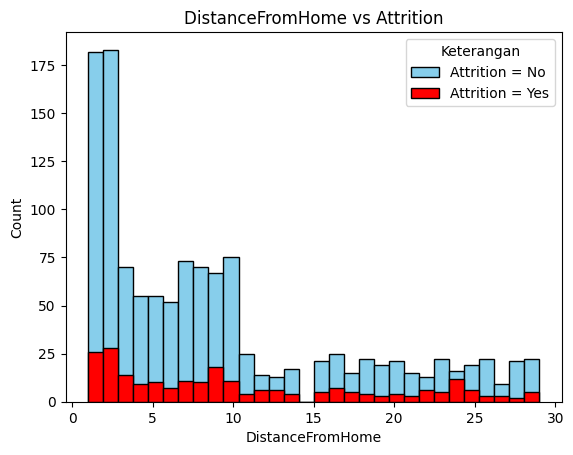

In [11]:
# Data filters
attrition_yes = df[df['Attrition'] == 'Yes']['DistanceFromHome']
attrition_no = df[df['Attrition'] == 'No']['DistanceFromHome']

# Creating a histogram visualization
plt.hist(attrition_no, bins=30, color='skyblue', edgecolor='black', alpha=1, label='Attrition = No')
plt.hist(attrition_yes, bins=30, color='red', edgecolor='black', alpha=1, label='Attrition = Yes')
plt.title('DistanceFromHome vs Attrition')
plt.xlabel('DistanceFromHome')
plt.ylabel('Count')
plt.legend(title='Keterangan')
plt.show()

**Analysis:**  Distance from home does not appear to have a strong influence on employee attrition in this company. Interestingly, attrition is relatively **high for employees living within 1–2 km**, but this is likely due to the **higher concentration of employees living at that distance**, rather than distance being a causal factor.

It’s also important to note that the dataset is **imbalanced** between employees who stayed and those who left, which may affect the interpretation of this feature.

> In this case, proximity to the workplace is **not a significant driver** of employee turnover.


## Is worklife balance a problem?

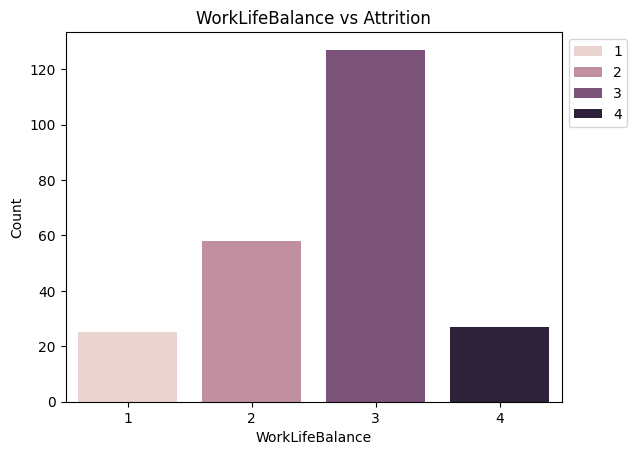

In [12]:
# Data filter and grouping
worklifebalance = df[df['Attrition'] == 'Yes']
worklifebalance_count = worklifebalance.groupby('WorkLifeBalance')['Attrition'].count().reset_index(name='count_WorkLifeBalance')

# Creating visualizations with barplots
sns.barplot(data=worklifebalance_count, x='WorkLifeBalance', y='count_WorkLifeBalance', hue='WorkLifeBalance')
plt.title('WorkLifeBalance vs Attrition')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('WorkLifeBalance')
plt.ylabel('Count')
plt.show()

Information :
- Low : 1
- Medium : 2
- High : 3
- Very High : 4

**Analysis:**  Interestingly, both **low and high work-life balance ratings** are associated with **lower attrition rates**.

- Employees with **low work-life balance** may be more focused on their work and may have already adapted to the demands of the job, reducing the likelihood of leaving.  
- On the other hand, employees with a **moderate work-life balance** might still seek better conditions elsewhere, which can explain the **increase in attrition in the middle range**.  
- When work-life balance reaches a **very high level**, employees tend to feel satisfied, and **attrition drops again**.

> This suggests that perceived balance alone is not the only factor—**expectation and personal ambition** may also influence turnover behavior.


## Are salary increases effective in keeping employees?

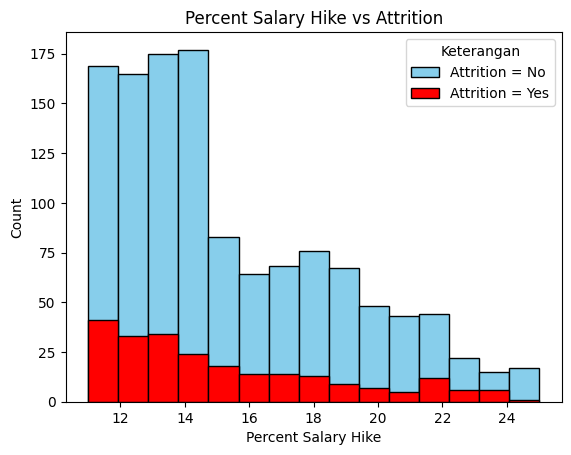

In [13]:
# Data filters
attrition_yes = df[df['Attrition'] == 'Yes']['PercentSalaryHike']
attrition_no = df[df['Attrition'] == 'No']['PercentSalaryHike']

# Creating visualizations with histograms
plt.hist(attrition_no, bins=15, color='skyblue', edgecolor='black', alpha=1, label='Attrition = No')
plt.hist(attrition_yes, bins=15, color='red', edgecolor='black', alpha=1, label='Attrition = Yes')
plt.title('Percent Salary Hike vs Attrition')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Count')
plt.legend(title='Keterangan')
plt.show()

**Analysis:**  A **higher percentage of salary increase** appears to **motivate employees to stay** with the company. This can be observed in the trend where **attrition rates decrease as salary hike percentages increase**.

Employees who receive significant salary increases may feel more **valued and financially secure**, reducing their intent to seek opportunities elsewhere.

> Compensation plays a key role in retention—**rewarding performance with meaningful salary adjustments** can lower the risk of attrition.


# V. Feature Engineering

Feature engineering is all processes for handling sequences (features) so that they are relevant to the model.

## Handling Duplicate

Duplicate data should be removed because it can cause data redundancy and the model only memorizes the data and does not find patterns.

In [14]:
# Drop data duplicate
df = df.drop_duplicates()

## Change label

The label data is still in the Yes and No string format and will be replaced so that it can be run in the modeling with scikit-learn.

In [15]:
# Before
df["Attrition"].head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [16]:
# Pergantian label ke angka dengan label encoder
label = LabelEncoder()
df["Attrition"] = label.fit_transform(df["Attrition"])

# After
df["Attrition"].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

## Handling Cardinality

Cardinality is a unique value that is owned by a data. Few unique values ​​indicate the type is included in the categorical type, it is important to know the data type so that the model is relevant, to check it you can understand the data and see the number of unique data owned by each column

### Define Column

This definition is by looking at the explanation related to the data owned.

| **Kolom**                | **Tipe**                  | **Jenis Encoding**     |
| ------------------------ | ------------------------- | ---------------------- |
| BusinessTravel           | Categorical (ordered)     | Ordinal encoding       |
| Department               | Categorical (not ordered) | One-hot encoding       |
| Education                | Categorical (ordered)     | Ordinal encoding       |
| EducationField           | Categorical (not ordered) | One-hot encoding       |
| EnvironmentSatisfaction  | Categorical (ordered)     | Ordinal encoding       |
| Gender                   | Categorical (not ordered) | One-hot encoding       |
| JobInvolvement           | Categorical (ordered)     | Ordinal encoding       |
| JobLevel                 | Categorical (ordered)     | Ordinal encoding       |
| JobRole                  | Categorical (not ordered) | One-hot encoding       |
| JobSatisfaction          | Categorical (ordered)     | Ordinal encoding       |
| MaritalStatus            | Categorical (not ordered) | One-hot encoding       |
| OverTime                 | Categorical (not ordered) | One-hot encoding       |
| PerformanceRating        | Categorical (ordered)     | Ordinal encoding       |
| RelationshipSatisfaction | Categorical (ordered)     | Ordinal encoding       |
| StockOptionLevel         | Categorical (ordered)     | Ordinal encoding       |
| WorkLifeBalance          | Categorical (ordered)     | Ordinal encoding       |


Data will be divided and defined based on its type. This definition is important for use in various processes that request numeric or categorical data types.

In [17]:
# Creating categorical column data
ordinal_column = ['BusinessTravel','Education','EnvironmentSatisfaction','PerformanceRating','JobInvolvement','JobLevel','JobSatisfaction','RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
onehot_column = ['Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
categorical_column = ordinal_column + onehot_column

# Creating numeric column data
numerical_column = list(df.select_dtypes(include='number').drop(columns=categorical_column, errors='ignore'))
numerical_column.remove('StandardHours')
numerical_column.remove('EmployeeCount')
numerical_column.remove('EmployeeNumber')

As explained in the data loading StandardHours and EmployeeCount are only one data that has no variation so it becomes useless when used, so the column will be deleted because it is not used. EmployeeNumber is a unique employee ID, it is useless for modeling and can cause the model to misjudge so it will be deleted. Column Over18 data string only contains the value Y, this column is administrative which shows all employees are over 18 years old and are said to be adults, this column will not be used because it is not informative

### View Cardinality Data Category

Displaying categorical data for cross validation

In [18]:
# Displays columns, number of unique data, and unique data
pd.set_option('display.max_colwidth', None)
list_ordinality = []
for col in categorical_column:
    list_ordinality.append([col, df[col].nunique(), df[col].unique()])
pd.DataFrame(columns=['column','value_counts', 'unique_value'], data=list_ordinality)

,column,value_counts,unique_value
0,BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
1,Education,5,"[2, 1, 4, 3, 5]"
2,EnvironmentSatisfaction,4,"[2, 3, 4, 1]"
3,PerformanceRating,2,"[3, 4]"
4,JobInvolvement,4,"[3, 2, 4, 1]"
5,JobLevel,5,"[2, 1, 3, 4, 5]"
6,JobSatisfaction,4,"[4, 2, 3, 1]"
7,RelationshipSatisfaction,4,"[1, 4, 2, 3]"
8,StockOptionLevel,4,"[0, 1, 3, 2]"
9,WorkLifeBalance,4,"[1, 3, 2, 4]"


For performance rating, it is usually in the range of 1-4, but in this dataset it is only in 3-4, if inference is done with other data, the model may not recognize it, as well as department and jobrole data. All data in validation is category data with a few unique values

## Correlation Matrics

Correlation has various tests that have advantages and disadvantages in general chi-square is tested for category data with categories, categories with numerics can use kendals.

Correlation hypothesis:

H0: There is a correlation (p-value <= 0.05)

H1: There is no correlation (p-value> 0.05)

In [19]:
# Save chi square correlation value
list_corr_chi = []
# Save Kendals correlation value
list_corr = []

# Looping to fill the correlation list
for col in list(df.columns):
    if col in categorical_column and col != 'Attrition':
        contingency_table = pd.crosstab(df[col], df['Attrition'])
        corr, p, dof, expected = stats.chi2_contingency(contingency_table)
        if p <= 0.05:
            h = 'correlation'
        else:
            h = "don't have correlation"
        list_corr_chi.append([col, p, h])
    else:
        corr, p = stats.kendalltau(df[col], df['Attrition'])
        if p <= 0.05:
            h = 'correlation'
        else:
            h = "don't have correlation"
        list_corr.append([col, p, h])

# Create a dataframe from the list of control correlations
corr = pd.DataFrame(columns=['column','correlation','hipotesis'], data=list_corr)
corr.sort_values(by='correlation',ascending=True  ,inplace=True)
display(corr)

# Create a dataframe from the chi square correlation list
corr_chi = pd.DataFrame(columns=['column','p-value','hipotesis'], data=list_corr_chi)
corr_chi.sort_values(by='p-value',ascending=True  ,inplace=True)
display(corr_chi)

,column,correlation,hipotesis
1,Attrition,0.000000e+00,correlation
13,TotalWorkingYears,2.398012e-14,correlation
7,MonthlyIncome,2.948926e-14,correlation
15,YearsAtCompany,2.914375e-13,correlation
16,YearsInCurrentRole,4.426913e-12,correlation
18,YearsWithCurrManager,1.805706e-11,correlation
0,Age,5.301368e-11,correlation
3,DistanceFromHome,2.386383e-03,correlation
2,DailyRate,2.899843e-02,correlation
17,YearsSinceLastPromotion,4.117047e-02,correlation


,column,p-value,hipotesis
11,OverTime,8.158424e-21,correlation
8,JobRole,2.752482e-15,correlation
7,JobLevel,6.634685e-15,correlation
14,StockOptionLevel,4.379390e-13,correlation
10,MaritalStatus,9.455511e-11,correlation
6,JobInvolvement,2.863181e-06,correlation
0,BusinessTravel,5.608614e-06,correlation
4,EnvironmentSatisfaction,5.123469e-05,correlation
9,JobSatisfaction,5.563005e-04,correlation
15,WorkLifeBalance,9.725699e-04,correlation


**Analysis** So statistically, the p-value shows several features that are not correlated with the attrition target, namely NumCompaniesWorked, PercentSalaryHike, MonthlyRate, HourlyRate, RelationshipSatisfaction, Gender, Education, PerformanceRating

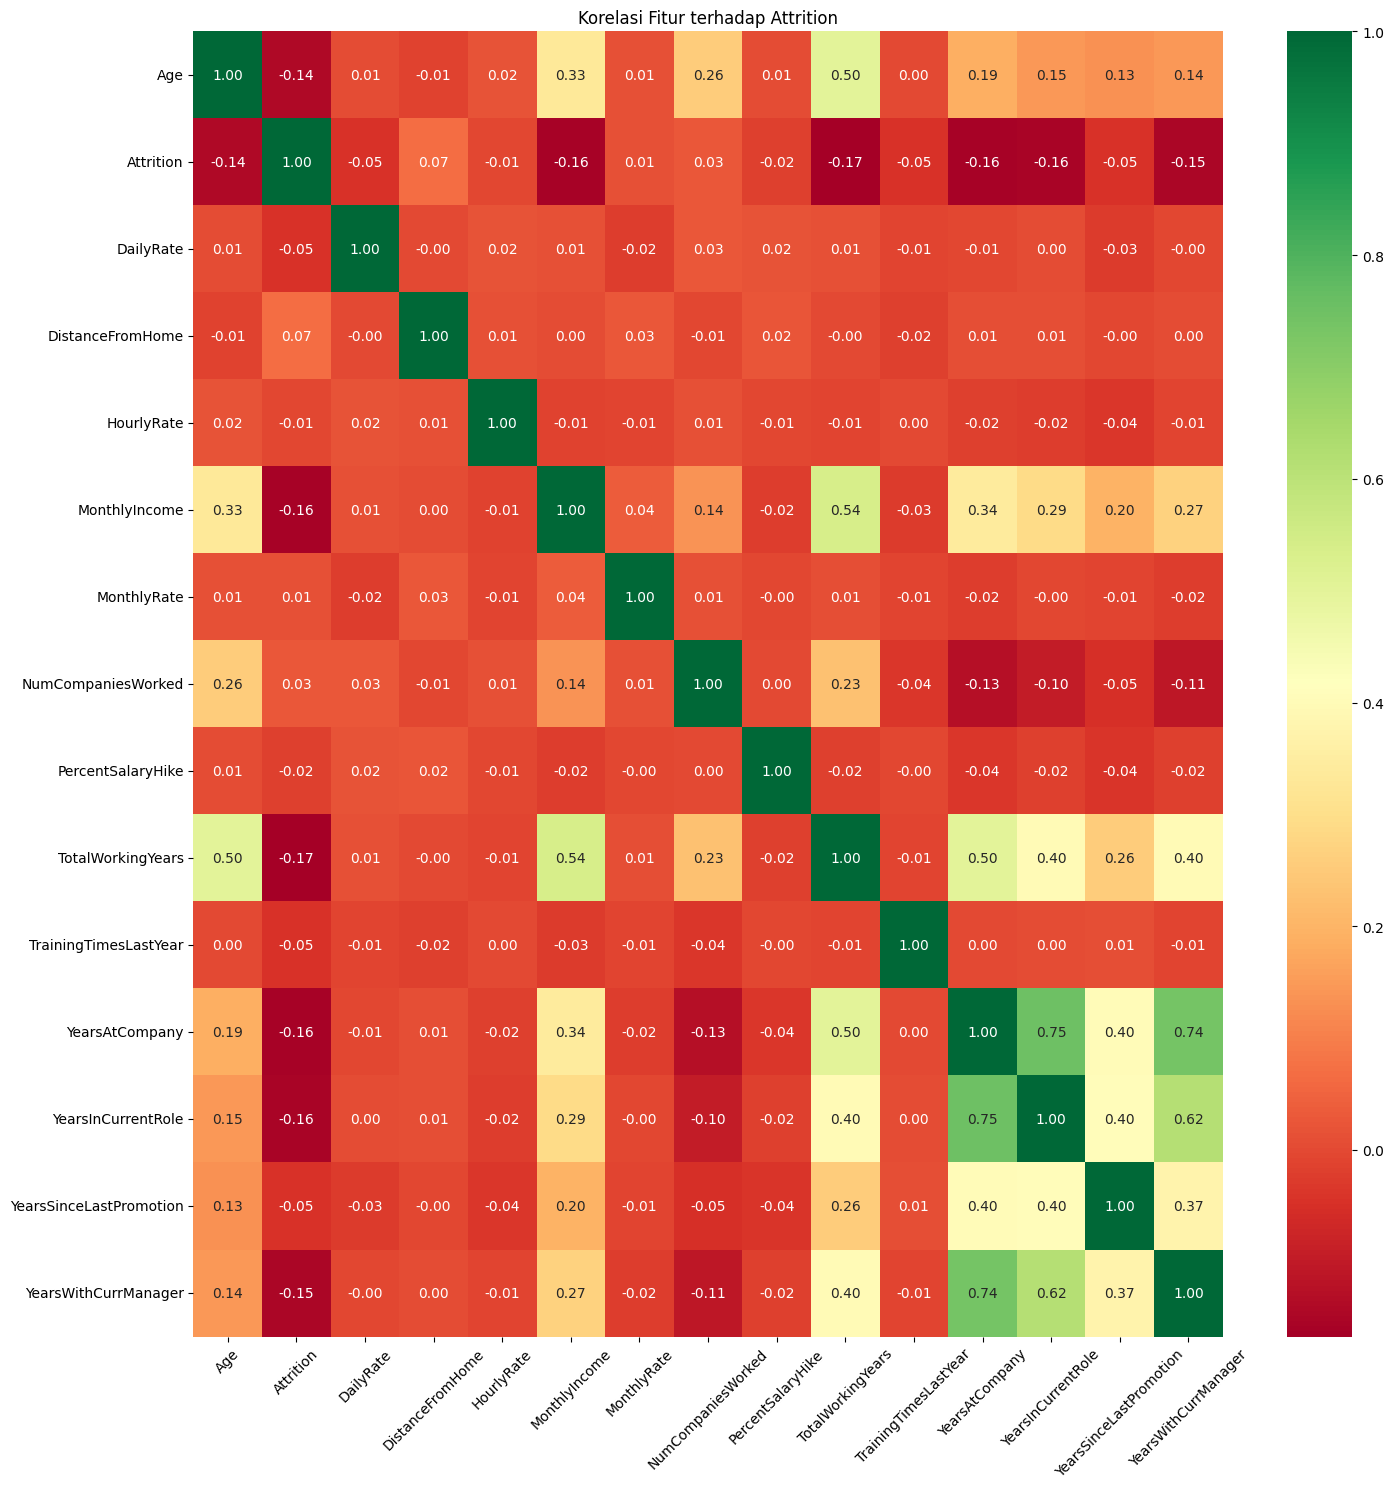

In [20]:
# To see how strong the relationship is, only on numeric data
plt.figure(figsize=(15, 15))
sns.heatmap(df[numerical_column].corr(method='kendall'), annot=True, cmap='RdYlGn', fmt=".2f")
plt.title("Korelasi Fitur terhadap Attrition")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analysis:** All data related to the year such as age, YearsAtcompany, etc. have a moderate to strong relationship, this is normal because all are affected by the year. Monthly income has a strong effect on the length of time worked, which can be interpreted as monthly salary increases with work experience. While the relationship between Attrition and other variables is very weak to weak. For the year I will choose Year Company as another representative year, because it causes multicollinearity problems when using the logistic regression model.

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_6728\707532751.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chi_df, x='Chi2', y='Feature', palette='RdYlGn')


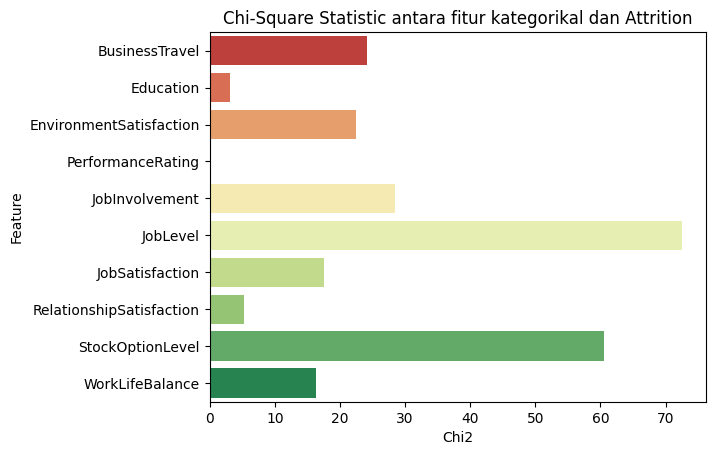

In [ ]:
def chi2_test(df, col1, col2):
    """Function to make crosstable and return chi2 and p"""
    table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    return chi2, p

# Looping test chi-square ordinal column
results = []
for col in ordinal_column:
    chi2, p = chi2_test(df, 'Attrition', col)
    results.append({'Feature': col, 'Chi2': chi2, 'p-value': p})

# Make dataframe
pd.DataFrame(results).sort_values('Chi2', ascending=False)

# Visualisation
chi_df = pd.DataFrame(results)
sns.barplot(data=chi_df, x='Chi2', y='Feature', palette='RdYlGn')
plt.title('Chi-Square Statistic Between Categorical And Attrition')
plt.show()

**Analysis:**
1. Features with the largest influence (high Chi2):
- JobLevel (largest) → very likely to be strongly related to attrition.
- StockOptionLevel → also has a strong relationship.
- BusinessTravel, JobInvolvement, EnvironmentSatisfaction → moderate to high influence.
2. Features with small influence (low Chi2):
- Education, RelationshipSatisfaction, PerformanceRating → likely to have little influence on attrition.

Features with low Chi2 values could be considered for elimination from the model due to their small influence, but since I don't have many other features, I'll keep them.

## Split Data Train and Test

Splitting to divide data into train data and test data, train data is used for the machine to learn patterns from its data, to create a model. Test data is used to test the results of the machine pattern, by testing the model to the test data.

In [22]:
# Split feature and target
X_data = df.drop(columns=['Attrition'], axis=1)
y_data = df['Attrition']

# Split data train and test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=9)
print(f'Train size : {X_train.shape}')
print(f'Test size : {X_test.shape}')

Train size : (1176, 34)
Test size : (294, 34)


Proportion of train data division 80%, test data 20%

## Handling Outlier

Outliers are values ​​that deviate significantly from the data distribution. Outliers can occur due to various possibilities, such as human error, sensor error, etc. Outliers must be removed to make statistical results undistorted.

In [23]:
# Function to output lower and upper outlier values
def outlier(dataframe, series):
    data = dataframe[series]
    skewness = data.skew()
    if -0.5 <= skewness <= 0.5:
        lower = data.mean() - (3 * data.std())
        upper = data.mean() + (3 * data.std())
    else:
        iqr = data.quantile(0.75) -  data.quantile(0.25)
        lower = data.quantile(0.25) - (1.5 * iqr)
        upper = data.quantile(0.75) + (1.5 *iqr)
    return lower, upper

Here using two methods namely turkey's rule and Z-score, assuming if the data is distributed close to normal it will be handled with Z-score because Z-score is good at cutting large variations based on standard variation, if the data is skewed it will be handled with turkey's rule because turkey's rule cuts data based on the interquartile range is suitable for skewed data. Z-score uses 3 times the standard deviation, and turkey's rule uses 1.5 times the iqr.

In [24]:
# Here it is removed because the label does not need to be handled
numerical_column.remove('Attrition')

# Empty list for outlier data
list_outlier = []

# Empty list for outlier data
for col in numerical_column:
    lower, upper = outlier(X_train, col)
    outlier_data = X_train[(X_train[col] < lower) | (X_train[col] > upper)]
    percentage = (len(outlier_data) / len(X_train[col])) * 100
    list_outlier.append([col, lower, upper, percentage])
    
# Create a dataframe to display
pd.DataFrame(columns=['column', 'lower', 'upper', 'percentage_outlier'], data=list_outlier)

,column,lower,upper,percentage_outlier
0,Age,9.167597,64.580703,0.000000
1,DailyRate,-424.148937,2028.387032,0.000000
2,DistanceFromHome,-16.000000,32.000000,0.000000
3,HourlyRate,4.172091,126.933351,0.000000
4,MonthlyIncome,-4801.250000,15752.750000,8.758503
5,MonthlyRate,-6793.704261,35774.336914,0.000000
6,NumCompaniesWorked,-3.500000,8.500000,3.401361
7,PercentSalaryHike,3.000000,27.000000,0.000000
8,TotalWorkingYears,-7.500000,28.500000,4.506803
9,TrainingTimesLastYear,0.500000,4.500000,15.816327


Outliers have two ways of handling them, namely by deleting them and using the capping method. Both methods have their advantages and disadvantages, such as deleting them will remove information, which may be important information, while capping changes the information and can make the information irrelevant. In this dataset, a threshold of 5% is created, where below 5% is an indication of low-value data and can be deleted. Looking at the outlier percentage, there are 4 features that exceed 5% and 4 features below 5%, because data is an important asset, the capping method will be used on outlier data.

In [25]:
# List save methods
gaussian_cols = []
iqr_cols = []

# Looping to fill the method column
for col in numerical_column:
    skewness = X_train[col].skew()
    if -0.5 <= skewness <= 0.5:
        gaussian_cols.append(col)
    else:
        iqr_cols.append(col)

# Capping for near normal features
if gaussian_cols:
    winsor_gauss = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=gaussian_cols, missing_values='ignore')
    X_train = winsor_gauss.fit_transform(X_train)

# Capping for skewed features
if iqr_cols:
    winsor_iqr = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=iqr_cols, missing_values='ignore')
    X_train = winsor_iqr.fit_transform(X_train)


If the skewness approaches normal, it will be capped using the Z-score/Gaussian method, whereas if it is skewed, it will use Turkey's rule/IQR.

## Handling Missing Value

Missing values ​​need to be handled and the cause investigated so that the model does not experience errors or mistakes in model interpretation.

In [26]:
# View the percentage of empty train data
X_train.isnull().mean()*100

Age                         0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInC

In [27]:
# View the percentage of empty test data
X_test.isnull().mean()*100

Age                         0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInC

Both train and test data did not find any empty data.

## Feature Selection

Feature selection is the process of selecting the most relevant subset of data features from an existing dataset to be used in a machine learning model. Data that will not be used is data that is uncorrelated or considered uninformative.

Unused feature selection:

- MonthlyRate, Not correlated, cost rate can be represented by daily rate
- HourlyRate, Not correlated, cost rate can be represented by daily rate
- PerformanceRating, Not correlated, data only consists of 3-4 majority of high employee assessments, less varied in providing information
- EmployeeCount, number of employees, not informative because there must be only 1 employee who has a unique id
- Over18, Only adult employee administration only 'Y' data, not varied so it does not provide information
- StandardHours, Working hours, not varied so it does not provide information
- EmployeeNumber, unique participant id number is not informative and can mislead the model

Uncorrelated feature selection that is maintained

- NumCompaniesWorked, Not correlated, but will still be used because it affects other features such as Age, MonthlyIncome, TotalWorkingYears. - RelationshipSatisfaction, Not correlated, but will still be used because it describes satisfaction with coworkers.
- Gender, Not correlated, but will still be used because it can describe equality analysis.
- Education, Not correlated, but will still be used because education can impact career aspirations and expectations.

In [28]:
# Remove unused column features
numerical_column.remove('MonthlyRate')
numerical_column.remove('YearsInCurrentRole')
numerical_column.remove('YearsSinceLastPromotion')
numerical_column.remove('YearsWithCurrManager')
numerical_column.remove('HourlyRate')
ordinal_column.remove('PerformanceRating')

# Create all the features that will be used
categorical_column = ordinal_column + onehot_column
selected_features = numerical_column + categorical_column

# Filter features of train and test data
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [29]:
print("Categorical Column")
print(categorical_column)
print("Numerical Column")
print(numerical_column)

Categorical Column
['BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Numerical Column
['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany']


## Transformation

| Skewness Range       | Category                | Transformation Suggestions           | Note                                                                |
| ----------------------- | ------------------------ | ---------------------------- | ---------------------------------------------------------------------- |
| skewness < -1         | Very skew to the left      | cube root (np.cbrt)        | Cube root transformation is safe for negative values                        |
| -1 ≤ skewness < -0.5  | Moderate skew to the left      | sqrt then times -1          | Not common, but can be tried if the model is sensitive                       |
| -0.5 ≤ skewness ≤ 0.5 | Almost symmetrical / normal | No transformation needed | Distribution is quite normal, leave it as is                            |
| 0.5 < skewness ≤ 1    | Medium skew to the right     | sqrt (np.sqrt)             | Fairly soft, suitable for light skew                                  |
| 1 < skewness ≤ 2      | High skew to the right     | log (np.log1p)             | Logs are very effective for suppressing long right tails                    |
| skewness > 2          | Very skew to the right     | cube root (np.cbrt)        | Cube root can stabilize very high values and remain safe for 0 |


In [ ]:
# Save transformation function per column based on training
transform_funcs = {}

for col in numerical_column:
    skew = X_train[col].skew()
    
    if skew < -1:
        func = "cbrt"
    elif -1 <= skew <= -0.5:
        func ="-1 * np.sqrt"
    elif 0.5 <= skew <= 1:
        func = "sqrt"
    elif 1 < skew <= 2:
        func = "log1p"
    elif skew > 2:
        func = "cbrt"
    else:
        func = "normal"
    
    # Save function to dict
    transform_funcs[col] = func
    
# Create a DataFrame with the function name
df_transform = pd.DataFrame({
    'column': list(transform_funcs.keys()),
    'transform_function': transform_funcs.values()
})
display(df_transform)

,column,transform_function
0,Age,normal
1,DailyRate,normal
2,DistanceFromHome,sqrt
3,MonthlyIncome,log1p
4,NumCompaniesWorked,sqrt
5,PercentSalaryHike,sqrt
6,TotalWorkingYears,sqrt
7,TrainingTimesLastYear,normal
8,YearsAtCompany,sqrt


**Analys:** The majority of columns are in the skewness range of 0.5-1

In [ ]:
class SkewTransformer(BaseEstimator, TransformerMixin):
    """
    Transform numerical columns based on skewness measured at fit time.
    
    transform_map_: dict column -> str code in {'identity','sqrt','neg_sqrt','log1p','cbrt'}
    """
    def __init__(self, clip_negative=True):
        """ Clip negativ prevent null data """
        self.clip_negative = clip_negative 

    def _decide_rule(self, skew):
        """Give skewness series"""
        if skew < -1:
            return 'cbrt'
        elif -1 <= skew < -0.5:
            return 'neg_sqrt'
        elif 0.5 < skew <= 1:
            return 'sqrt'
        elif 1 < skew <= 2:
            return 'log1p'
        elif skew > 2:
            return 'cbrt'
        else:
            return 'identity'
    
    def fit(self, X, y=None):
        """Get datafram column and skewness"""
        # Check dataframe or array
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
            
        # Get column
        self.columns_ = X.columns if hasattr(X, "columns") else np.arange(X.shape[1])
        
        # Make dataframe column and skew
        self.transform_map_ = {}
        
        # Looping for fill transform_map_ 
        for col in self.columns_:
            skew = pd.Series(X[col]).skew()
            self.transform_map_[col] = self._decide_rule(skew)
        return self
    
    def _apply_rule(self, s, rule):
        """Form rule clip not negative and return transformation"""
        if rule == 'identity':
            return s
        elif rule == 'sqrt':
            if self.clip_negative:
                s = np.clip(s, 0, None)
            return np.sqrt(s)
        elif rule == 'neg_sqrt':
            if self.clip_negative:
                s = np.clip(s, 0, None)
            return -np.sqrt(s)
        elif rule == 'log1p':
            if self.clip_negative:
                s = np.clip(s, 0, None)
            return np.log1p(s)
        elif rule == 'cbrt':
            return np.cbrt(s)
        else:
            return s
    
    def transform(self, X):
        """Tranformation base on skew"""
        # Check datafreame or array
        is_df = hasattr(X, "columns")
        if not is_df:
            X = pd.DataFrame(X, columns=self.columns_)
        X_out = X.copy()
        
        # Looping to apply rule
        for col in self.columns_:
            rule = self.transform_map_.get(col, 'identity')
            X_out[col] = self._apply_rule(X_out[col], rule)
        return X_out if is_df else X_out.values

## Scaling

Scaling/normalization is the process of equalizing the scale of features.

In [32]:
# columns are distributed approximately normally
gaussian_cols

['Age', 'DailyRate', 'HourlyRate', 'MonthlyRate']

In [33]:
# Skewed distributed columns
iqr_cols

['DistanceFromHome',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Because much of the data is distributed skewed, we use MinMaxScaler because it is sensitive to absolute distance, compared to StandardScaler which is based on linear distance distribution.

In [34]:
# Save MinMaxScaler method
scale = MinMaxScaler()

## Handling Data Imbalance

Data imbalance needs to be handled so that the machine does not memorize data patterns from the majority of labels.

| Degree of imbalance | Proportion of Minority Class |
| --- | --- |
| Mild | 20-40% of the data set |
| Moderate | 1-20% of the data set |
| Extreme | < 1% of the data set |


In [35]:
# Calculating the proportion of labels
attraction_yes = y_train[y_train == 1].count()
attraction_no = y_train[y_train == 0].count()
print(f'Amount yes :{attraction_yes}, percentage {(attraction_yes/(y_train.count()))*100}%')
print(f'Amount no :{attraction_no}, percentage {(attraction_no/(y_train.count()))*100}%')

Amount yes :189, percentage 16.071428571428573%
Amount no :987, percentage 83.92857142857143%


Here the minority only has 16% of the data, including moderate, so it is necessary to handle the imbalance.

In [36]:
# Store column index so that the order is correct in somtenc
ordinal_index = []
onehot_index = []
numerical_index = []
X_train_column = list(X_train.columns)

# Lopping fills the index column
for col in X_train_column:
    if col in ordinal_column:
        ordinal_index.append(X_train.columns.get_loc(col))
    elif col in onehot_column:
        onehot_index.append(X_train.columns.get_loc(col))
    else:
        numerical_index.append(X_train.columns.get_loc(col))

# Final index of categorical column according to position in X_train
categorical_index = ordinal_index + onehot_index

This is important to know the appropriate data index in X_train

In [37]:
# Save smotenc variable
smotenc = SMOTENC(categorical_features=categorical_index, random_state=9)

## Encoding

Since we already know the type of column to be encoded, here we will only declare the method. Ordinal encoding is used for data that has levels or sequences, while onehot encoding is used for equivalent data.

In [38]:
# Declare method to variable
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

## Transformer

Transformer or preprocessing process is useful for storing scaler methods, encoding, or other methods that change data types. For model selection, the outlier handle will be outside the transformer because it is done manually for deeper analysis.

In [39]:
numerical_pipeline = ImbPipeline([
    ('skew', SkewTransformer()),
    ('scaler', scale)
])

In [40]:
# Transform
preproses = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_column),
    ('ordinal', ordinal_encoder, ordinal_column),
    ('onehot', onehot_encoder, onehot_column)
], remainder='drop')

Here, use remainder='drop' to delete features that exist but are not used in the preprocessing that has been selected.

# VI. Modeling Definition

Create a base model to validate the recall score

In [41]:
# Dictionary contains the models used
models = {
    'logreg': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'rf': RandomForestClassifier(),
    'svm': SVC(probability=True),
    'tree': DecisionTreeClassifier(),
    'gradient': GradientBoostingClassifier(),
    'adaboost' : AdaBoostClassifier(),
    'hist' : HistGradientBoostingClassifier()
    }

### Finding the Best Model With Cross Validation

Score recall is chosen because the main focus is to find false negatives, or find the scores of all employees who actually leave, how many are detected?

In [42]:
# The main score sought
scoring = {
    'recall': 'recall',
    'rocauc': 'roc_auc'
}

# Save score results
results = {}

# Looping runs
for name, model in models.items():
    # Make pipeline: SMOTENC + Preprocessing + Model
    pipeline = ImbPipeline([
        ('smotenc', smotenc),
        ('preproses', preproses),
        ('classifier', model)
    ])

    # Cross-validation with 5-fold
    scores = cross_validate(
        pipeline,
        X_train,
        y_train,
        scoring=scoring,
        cv=5,
        return_train_score=True
    )

    # Save cross validation and standar deviasi
    results[name] = {
        'train_recall_mean': scores['train_recall'].mean(),
        'train_recall_std': scores['train_recall'].std(),
        'train_rocauc_mean': scores['train_rocauc'].mean(),
        'train_rocauc_std': scores['train_rocauc'].std()
    }

# T# Display DataFrame
df_results = pd.DataFrame(results).T.sort_values(by='train_recall_mean', ascending=False)
display(df_results)

c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instea

,train_recall_mean,train_recall_std,train_rocauc_mean,train_rocauc_std
rf,1.000000,0.000000,1.000000,0.000000
tree,1.000000,0.000000,1.000000,0.000000
hist,1.000000,0.000000,1.000000,0.000000
knn,0.837287,0.013797,0.910582,0.009318
gradient,0.783060,0.023909,0.963481,0.003372
svm,0.690423,0.032170,0.874128,0.011643
adaboost,0.683818,0.022474,0.859295,0.015837
logreg,0.667959,0.014766,0.821428,0.014232


In [43]:
df_results = pd.DataFrame(results).T

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_6728\1851256990.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


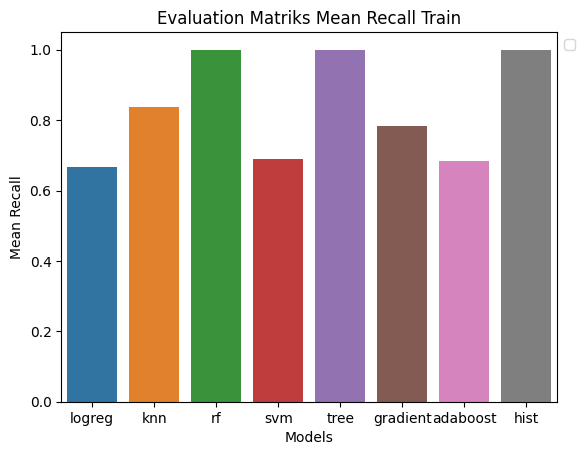

In [44]:
# Creating a barplot visualization
sns.barplot(data=df_results, x=df_results.index , y='train_recall_mean', hue=df_results.index)
plt.title('Evaluation Matriks Mean Recall Train')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Models')
plt.ylabel('Mean Recall')
plt.show()

**Analyst:**
Recall measures the model's ability to find all true positives.

| Model | Recall | Analysis |
| -------------------------------------- | -------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| rf (Random Forest) | 1.00 | Very high, tends to overfit. This is normal because Random Forest is a collection of Decision Trees, which are very flexible and can memorize training data if not limited (e.g., the number of trees is too large, or the maximum depth is too deep). |
| tree (Decision Tree) | 1.00 | Identical to Random Forest (without ensemble), and usually more easily overfit because a single tree Can grow to pure leaf (each leaf only has one data point). |
| hist (Histogram Gradient Boosting) | 1.00 | Equally flexible, because HGB is a boosted tree with histogram binning techniques. Boosting makes the model highly adaptive to data — so when unconstrained, it can also overfit like a tree. |
| knn (K-Nearest Neighbors) | 0.837 | Good results but not extreme. KNN is based on Euclidean distance or something similar, and performance is heavily influenced by local distributions. Overfit can occur if k is too small, but this score is fairly balanced. |
| gradient (Gradient Boosting) | 0.783 | A boosting model that tends to be more controlled than HGB, because it uses gradient loss and regularization. It doesn't overfit, but it's quite flexible. |
| svm (Support Vector Machine) | 0.690 | Tends to be moderate. SVM is a separating hyperplane-based model, and avoids too many margin violations. It rarely overfits in recall because its underlying structure is not a tree/boost, but a margin (and therefore more "rigid"). |
| adaboost | 0.684 | Also a type of boosting, but it works by increasing the weight of previous errors. The results are not as extreme as HGB or regular Gradient Boosting, because the weak learner is sometimes simple. |
| logreg | 0.668 | Lowest. Pure linear model, with a linear decision boundary → difficult to capture non-linearity. Underfit is normal, especially if the data is complex or not linearly separable. |

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_6728\1282626871.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


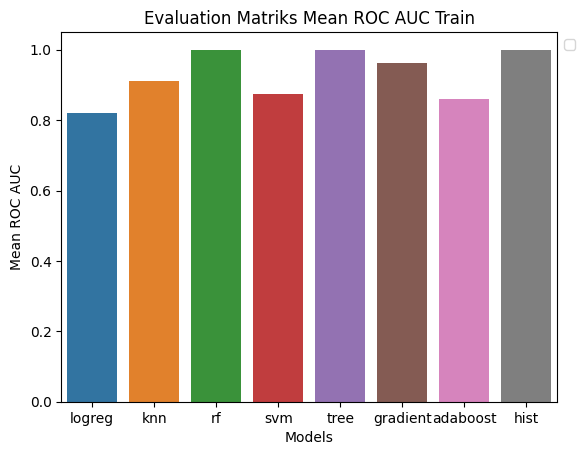

In [45]:
# Creating a barplot visualization
sns.barplot(data=df_results, x=df_results.index , y='train_rocauc_mean', hue=df_results.index)
plt.title('Evaluation Matriks Mean ROC AUC Train')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Models')
plt.ylabel('Mean ROC AUC')
plt.show()

| Model | AUC | Analysis |
| -------------------------------------- | -------- | ------------------------------------------------------------------------------------------------------- |
| rf (Random Forest) | 1.00 | Perfect score. Random Forest often achieves a high AUC because it captures all patterns, even if it overfits. |
| tree (Decision Tree) | 1.00 | Similar to RF — despite being a simple model (single tree), it can fit the data very accurately (training). |
| hist (Histogram Gradient Boosting) | 1.00 | Very high results. HGB is very flexible and tends to learn from noise as well, especially during training. |
| knn (K-Nearest Neighbors) | 0.910 | Still very high. This indicates that KNN is quite good at separating the two classes, although not as precise as tree-based. |
| gradient (Gradient Boosting) | 0.963 | A very high AUC score indicates the model is very good at distinguishing classes. Boosting improves performance. |
| svm (Support Vector Machine) | 0.874 | Fairly good. SVM works to optimize the margin between classes, and this is reflected in the fairly stable AUC. |
| adaboost | 0.859 | Slightly below SVM, which is understandable since Adaboost is sometimes not as precise as the more modern gradient boosting. |
| logreg | 0.821 | Still acceptable. This shows that, despite being linear, logreg can capture the direction of separation between classes. |

**General Conclusions:**

- Decision tree-based models (RF, Tree, HGB) tend to overfit if not constrained, so even with perfect recall and AUC, performance on unseen data can drop drastically.

- Distance-based models like KNN can overfit if not carefully selected in their parameter (k), but they more naturally capture nonlinear data.

- Models like SVM and Adaboost produce intermediate results and tend to be more stable because their underlying principle is not to "memorize" the data.

- Linear models like Logistic Regression are most likely to underfit on complex datasets due to their rigid boundaries.

# VII Model Training

In [46]:
eval_results = []

dataset = {
    'train' : (X_train, y_train),
    'test' : (X_test, y_test)
}

for name, model in models.items():
    pipeline = ImbPipeline([
        ('smotenc', smotenc),
        ('preproses', preproses),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)

    for data, (X, y) in dataset.items():
        y_pred = pipeline.predict(X)
        
        y_prob = pipeline.predict_proba(X)[:, 1]
        auc = roc_auc_score(y, y_prob)

        report = classification_report(y, y_pred, output_dict=True)
        eval_results.append({
            'Model': name,
            'Dataset': data,
            'Recall': report['1']['recall'],
            'AUC': auc
        })

df_results = pd.DataFrame(eval_results)
df_results


c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instea

,Model,Dataset,Recall,AUC
0,logreg,train,0.656085,0.817774
1,logreg,test,0.562500,0.808604
2,knn,train,0.846561,0.912843
3,knn,test,0.583333,0.716675
4,rf,train,1.000000,1.000000
5,rf,test,0.312500,0.779556
6,svm,train,0.703704,0.873295
7,svm,test,0.562500,0.827405
8,tree,train,1.000000,1.000000
9,tree,test,0.312500,0.581047


C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_6728\2884248910.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


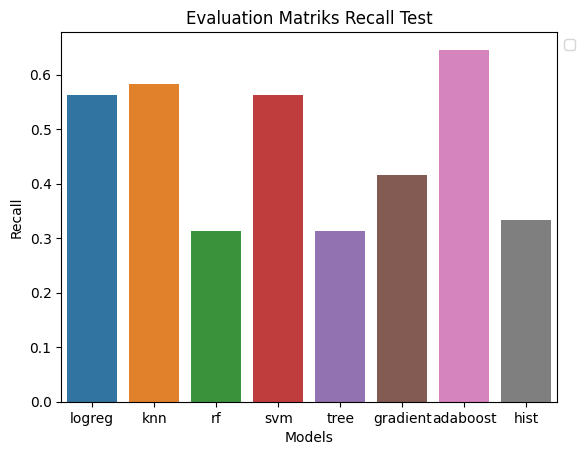

In [47]:
# Creating a barplot visualization
sns.barplot(data=df_results[df_results['Dataset']=='test'], x='Model' , y='Recall', hue='Model')
plt.title('Evaluation Matriks Recall Test')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Models')
plt.ylabel('Recall')
plt.show()

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_6728\2356032256.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


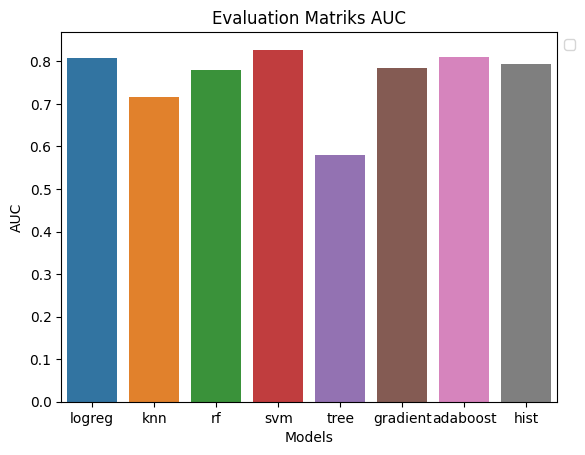

In [48]:
# Creating a barplot visualization
sns.barplot(data=df_results[df_results['Dataset']=='test'], x='Model' , y='AUC', hue='Model')
plt.title('Evaluation Matriks AUC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Models')
plt.ylabel('AUC')
plt.show()

| Model | Recall (Train vs Test) | AUC (Train vs Test) | Brief Analysis |
| ------------ | ---------------------- | ------------------- | ----------------------------------------------------------------------------- |
| logreg | 0.656 → 0.563 | 0.818 → 0.809 | Stable & balanced. Not overfit, although performance is limited. |
| knn | 0.847 → 0.583 | 0.913 → 0.717 | Moderate overfit. KNN learns too locally on the train. |
| rf | 1.000 → 0.313 | 1.000 → 0.780 | Severe overfit. On perfect train, test crashes. |
| svm | 0.704 → 0.563 | 0.873 → 0.827 | Fairly stable performance. Generally not overfit, but limited recall. |
| tree | 1,000 → 0.313 | 1,000 → 0.581 | Same as RF. High overfit because the tree learns too specifically. |
| gradient | 0.746 → 0.417 | 0.949 → 0.785 | Fairly overfit. Flexible boosting, but still difficult to generalize. |
| adaboost | 0.704 → 0.646 | 0.857 → 0.811 | Most stable! Fairly high recall, stable AUC. Best balance. |
| hist | 1,000 → 0.333 | 1,000 → 0.795 | Extreme overfit, similar to RF & Tree. Only good on train. |

**Final Conclusion: Which is Better?**

In terms of Recall (capturing positive cases):
- High train but low test → rf, tree, hist, gradient: too overfit.
- Best and most stable in recall → adaboost, capturing positives in the test (0.646).
In terms of AUC (overall ability to distinguish between positive and negative classes):
- High & stable → logreg, svm, adaboost → not only capturing positives but also avoiding false positives.

adaboost excels on both counts.

🏆 Best Model: AdaBoost
✅ Why is AdaBoost considered the best?
- High recall in the test (0.646) — only slightly lower than the training.
- High and stable AUC (0.857 → 0.811) — indicating the model is good at class differentiation.
- No overfitting — test performance is close to the training.
- Outperforms other models that overfit even with perfect training recall (RF, Tree, Hist).
- Much better than LogReg and SVM in terms of recall (the main metric you're focusing on)

Model Ranking (From Best to Worst, Based on Test Recall & AUC)
1. 🥇 AdaBoost – Balanced, strong recall, stable AUC.
2. 🥈 SVM – Stable & not overfit, but recall slightly lower than AdaBoost.
3. 🥉 LogReg – Very stable, easy to explain, but low recall.
4. Gradient Boosting – Powerful but moderate overfit.
5. KNN – High recall in training, drops in testing. Moderate overfit.
6. Random Forest – Severe overfit, poor test recall.
7. Tree – Extreme overfit, very poor test results.
8. HistGB – Equally bad as RF and Tree.

#  VII. Hyperparameter Tuning

**Adabost Best Model ?**
😈 other models: wait and see after hyper parameter tunning 
Model training is a step to try hyper parameter tuning, where you try variations of the parameters to get the best results.

## Setup Parameter Model

### Logreg

In [49]:
# Set parameter
c = [float(x) for x in np.linspace(0.1, 5, 5)]
penalty = ['l1', 'l2', 'elasticnet']
random_state = [10]
solver = ['saga']

# Random search dictionary
params_logreg = {
    'classifier__C': c,
    'classifier__penalty' : penalty,
    'classifier__solver': solver,
    'classifier__l1_ratio': [0.5],
    'classifier__random_state' : random_state}

### KNN

In [50]:
# Set parameter
n_neighbors = [3,5,7,9]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [15, 30, 45]

# Random search dictionary
params_knn = {
    'classifier__n_neighbors': n_neighbors,
    'classifier__weights' : weights,
    'classifier__algorithm': algorithm,
    'classifier__leaf_size': leaf_size
}

### Random Forest

In [51]:
# Set parameter
n_estimators = [3,5,7,9]
criterion = ['gini', 'entropy', 'log_loss']
min_samples_split= [15, 30, 45]
min_samples_leaf = [2, 4, 6, 8]
max_features = ['sqrt', 'log2']

# Random search dictionary
params_rf = {
    'classifier__n_estimators': n_estimators,
    'classifier__criterion' : criterion,
    'classifier__min_samples_split': min_samples_split,
    'classifier__min_samples_leaf': min_samples_leaf,
    'classifier__max_features': max_features
}

### SVM

In [66]:
# Set parameter
c = [float(x) for x in np.linspace(0.1, 5, 5)]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [3,6,9,12,15,18]
gamma = ['scale', 'auto']

# Random search dictionary
params_svm = {
    'classifier__C': c,
    'classifier__kernel' : kernel,
    'classifier__degree': degree,
    'classifier__gamma': gamma,
    'classifier__random_state' : random_state}

### Decision Tree

In [53]:
# Set parameter
splitter = ['best', 'random']
criterion = ['gini', 'entropy', 'log_loss']
min_samples_split= [15, 30, 45]
min_samples_leaf = [2, 4, 6, 8]
max_features = ['sqrt', 'log2']

# Random search dictionary
params_dc = {
    'classifier__splitter': splitter,
    'classifier__criterion' : criterion,
    'classifier__min_samples_split': min_samples_split,
    'classifier__min_samples_leaf': min_samples_leaf,
    'classifier__max_features': max_features
}

### GradientBoost

In [54]:
# Set parameter
loss = ['log_loss', 'exponential']
learning_rate = [0.1, 0.2, 0.3]
n_estimators= [3,5,7,9]
criterion = ['friedman_mse', 'squared_error']

# Random search dictionary
params_gb = {
    'classifier__loss': loss,
    'classifier__learning_rate' : learning_rate,
    'classifier__n_estimators': n_estimators,
    'classifier__criterion': criterion
}

### AdaBoost

In [55]:
# Set parameter
learning_rate = [0.1, 0.2, 0.3]
n_estimators= [3,5,7,9]

# Random search dictionary
params_ab = {
    'classifier__learning_rate' : learning_rate,
    'classifier__n_estimators': n_estimators
}

### HistoBoost

In [56]:
# Set parameter
max_iter= [100, 150, 200]
max_leaf_nodes = [31, 40, 50, 60]
min_samples_leaf = [20, 40, 60]

# Random search dictionary
params_hb = {
    'classifier__max_iter': max_iter,
    'classifier__max_leaf_nodes': max_leaf_nodes,
    'classifier__min_samples_leaf': min_samples_leaf
}

## Model Training

In [67]:
models_hyperparameter = {
    'logreg': (LogisticRegression(), params_logreg),
    'knn': (KNeighborsClassifier(), params_knn),
    'rf': (RandomForestClassifier(), params_rf),
    'svm': (SVC(probability=True), params_svm),
    'tree': (DecisionTreeClassifier(), params_dc),
    'gradient': (GradientBoostingClassifier(), params_gb),
    'adaboost' : (AdaBoostClassifier(), params_ab),
    'hist' : (HistGradientBoostingClassifier(), params_hb)
    }

dataset = {
    'train' : (X_train, y_train),
    'test' : (X_test, y_test)
}

In [68]:
eval_hyper = []

for name, (model, param) in models_hyperparameter.items():
    pipeline = ImbPipeline([
        ('smotenc', smotenc),
        ('preproses', preproses),
        ('classifier', model)
    ])
    
    random = RandomizedSearchCV(estimator=pipeline, param_distributions=param, cv=5, scoring='recall', n_iter=100, n_jobs=-1, random_state=10, error_score='raise', verbose=1)
    random.fit(X_train, y_train)

    for data, (X, y) in dataset.items():
        y_pred = random.predict(X)
        
        y_prob = random.predict_proba(X)[:, 1]
        auc = roc_auc_score(y, y_prob)

        report = classification_report(y, y_pred, output_dict=True)
        eval_hyper.append({
            'Model': name,
            'Dataset': data,
            'Recall': report['1']['recall'],
            'AUC': auc,
            'Best Parameter': random.best_params_
        })


c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 15 is smaller than n_iter=100. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 96 candidates, totalling 480 fits


c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\envs\h8_env\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Best parameters used to get the highest recall score

# VIII. Model Evaluation

Evaluate the model by looking at the recall score and comparing it to the test data.

In [59]:
df_results = pd.DataFrame(eval_hyper)
df_results

,Model,Dataset,Recall,AUC,Best Parameter
0,logreg,train,0.698413,0.806468,"{'classifier__solver': 'saga', 'classifier__random_state': 10, 'classifier__penalty': 'elasticnet', 'classifier__l1_ratio': 0.5, 'classifier__C': 0.1}"
1,logreg,test,0.562500,0.812077,"{'classifier__solver': 'saga', 'classifier__random_state': 10, 'classifier__penalty': 'elasticnet', 'classifier__l1_ratio': 0.5, 'classifier__C': 0.1}"
2,knn,train,0.825397,0.884429,"{'classifier__weights': 'uniform', 'classifier__n_neighbors': 9, 'classifier__leaf_size': 15, 'classifier__algorithm': 'auto'}"
3,knn,test,0.666667,0.743394,"{'classifier__weights': 'uniform', 'classifier__n_neighbors': 9, 'classifier__leaf_size': 15, 'classifier__algorithm': 'auto'}"
4,rf,train,0.634921,0.882086,"{'classifier__n_estimators': 9, 'classifier__min_samples_split': 45, 'classifier__min_samples_leaf': 8, 'classifier__max_features': 'sqrt', 'classifier__criterion': 'gini'}"
5,rf,test,0.437500,0.784638,"{'classifier__n_estimators': 9, 'classifier__min_samples_split': 45, 'classifier__min_samples_leaf': 8, 'classifier__max_features': 'sqrt', 'classifier__criterion': 'gini'}"
6,svm,train,0.915344,0.798250,"{'classifier__random_state': 10, 'classifier__kernel': 'poly', 'classifier__gamma': 'auto', 'classifier__degree': 9, 'classifier__C': 0.1}"
7,svm,test,0.916667,0.789126,"{'classifier__random_state': 10, 'classifier__kernel': 'poly', 'classifier__gamma': 'auto', 'classifier__degree': 9, 'classifier__C': 0.1}"
8,tree,train,0.597884,0.808942,"{'classifier__splitter': 'random', 'classifier__min_samples_split': 30, 'classifier__min_samples_leaf': 8, 'classifier__max_features': 'log2', 'classifier__criterion': 'log_loss'}"
9,tree,test,0.500000,0.705200,"{'classifier__splitter': 'random', 'classifier__min_samples_split': 30, 'classifier__min_samples_leaf': 8, 'classifier__max_features': 'log2', 'classifier__criterion': 'log_loss'}"


C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_6728\2884248910.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


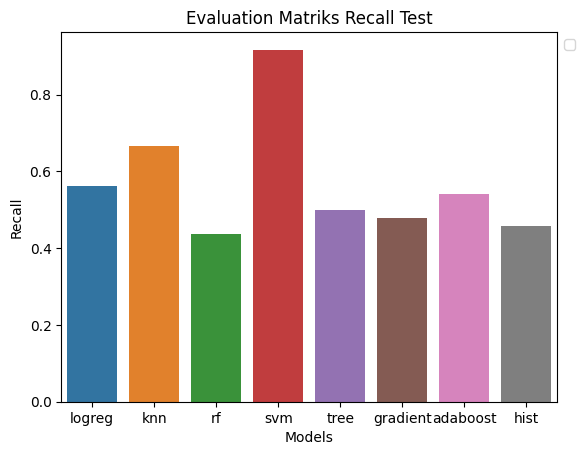

In [60]:
# Creating a barplot visualization
sns.barplot(data=df_results[df_results['Dataset']=='test'], x='Model' , y='Recall', hue='Model')
plt.title('Evaluation Matriks Recall Test')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Models')
plt.ylabel('Recall')
plt.show()

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_6728\2356032256.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


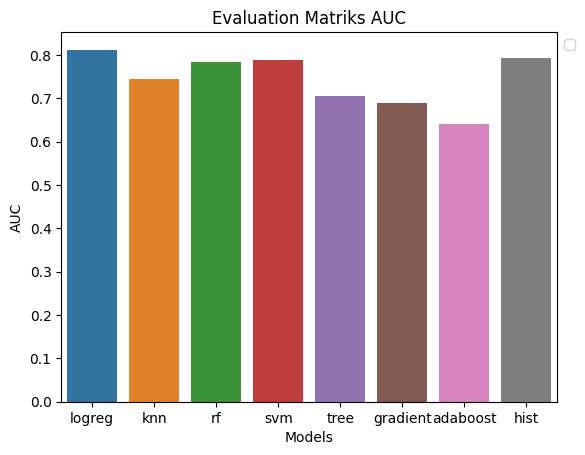

In [61]:
# Creating a barplot visualization
sns.barplot(data=df_results[df_results['Dataset']=='test'], x='Model' , y='AUC', hue='Model')
plt.title('Evaluation Matriks AUC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Models')
plt.ylabel('AUC')
plt.show()

| Model | Recall (Test) | AUC (Test) | Description |
| ------------ | ------------- | ---------- | --------------------------------------------------------------- |
| **SVM** | **0.917** | 0.789 | Highest test recall, fairly good AUC, although not the highest |
| **KNN** | 0.667 | 0.743 | Good test recall, moderate AUC, still stable |
| **LogReg** | 0.563 | 0.812 | High test AUC, somewhat low recall |
| **HistGB** | 0.458 | 0.793 | Severe overfit (very high train, drastically reduced test) |
| **RF** | 0.438 | 0.785 | Also overfits, but not as severely as HistGB |
| **Gradient** | 0.479 | 0.689 | Performance drops significantly on the test set |
| **Adaboost** | 0.542 | 0.642 | Lowest recall and AUC |
| **Tree** | 0.500 | 0.705 | Most balanced model but not as prominent |


🔹 **Best Model: SVM**
Because it has the highest recall in the test (0.917) with stability between train and test, making it the primary choice for cases where the positive class is crucial.

> Based on these results, it exceeds the main standard of the evaluation matrix focus **80% of employees who leave** (recall ≥ 0.80), so it can be concluded that the model creation was successful.

# IX. Model Saving

Due to the need for accountability for work and evaluation of input for the team, the best model will still be used for inference in Streamlit. The following is the process of saving the model into PKL format.

In [62]:
# Model definition
best_model = random.best_estimator_

# Save to file
pickle.dump(best_model, open('best_model.pkl', 'wb'))

# X. Inference

Inference is a stage for predicting new data, inference is made in a different notebook file to see the results of loading data, namely in the file : `inference.ipynb`

Inference can also be used to predict data directly by visiting the Huggingface website with the following link:
[Link EDA and Inference](https://huggingface.co/spaces/ifananwar/attrition-classifier)

In [63]:
# Load model into best_model
with open('best_model.pkl', 'rb') as file:
    best_model = pickle.load(file)

In [64]:
# Create new employee data
data_inf = {
    'Age' : 41,
    'Attrition' : 1,
    'BusinessTravel' : 'Travel_Rarely',
    'DailyRate' : 1102,
    'Department' : 'Sales',
    'DistanceFromHome' : 1,
    'Education' : 2,
    'EducationField' : 'Life Sciences',
    'EmployeeNumber' : 1,
    'EnvironmentSatisfaction' : 2,
    'Gender' : 'Female',
    'HourlyRate' : 94,
    'JobInvolvement' : 3,
    'JobLevel' : 2,
    'JobRole' : 'Sales Executive',
    'JobSatisfaction' : 4,
    'MaritalStatus' : 'Single',
    'MonthlyIncome' : 6000,
    'MonthlyRate' : 19500,
    'NumCompaniesWorked' : 8,
    'OverTime' : 'Yes',
    'PercentSalaryHike' : 11,
    'PerformanceRating' : 3,
    'RelationshipSatisfaction' : 1,
    'StockOptionLevel' : 0,
    'TotalWorkingYears' : 8,
    'TrainingTimesLastYear' : 0,
    'WorkLifeBalance' : 1,
    'YearsAtCompany' : 6,
    'YearsInCurrentRole' : 4,
    'YearsSinceLastPromotion' : 0,
    'YearsWithCurrManager' : 5
}

# Ubah ke dataframe
data_inf = pd.DataFrame([data_inf])
data_inf

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5


In [65]:
# Predicting new employee data
y_pred_inf = best_model.predict(data_inf)
y_pred_inf

array([1])

It is found that employees who are predicted to potentially leave the workplace. However, this is not necessarily accurate, someone does not necessarily leave just because they are predicted to leave, therefore the company can conduct stay interviews or job satisfaction questionnaires for these employees.

# XI. ✅ Conclusion

The following key insights and conclusions were drawn from the analysis:

1. **Higher salaries and salary increases** motivate employees to stay longer with the company.
2. A **balanced work environment and moderate work-life balance**—not too poor and not excessively comfortable—helps employees stay focused and reduces their intention to leave.
3. **Departments with high workload and pressure** tend to have higher attrition rates, as employees seek roles with less stress and easier adaptation.
4. Employees are more likely to leave during the **early stage of their career** at a company. However, once they adapt and find stability, they are more likely to stay.
5. There is **no strong relationship** between the distance from home and employee attrition.
6. The best-performing base model was **AdaBoost**, Balanced, strong recall, stable AUC.
7. But after **Hyperparameter tuning** Best model was **SVM** Because it has the highest recall in the test (0.917) with stability between train and test, making it the primary choice for cases where the positive class is crucial.
8. The best model will be **used for inference**, and successfully run on **different notebooks** and **websites with the Streamlit framework**.
9. Future improvements may include:
   - Adding more data and **new features**  
   - Enhancing **feature engineering**  
   - Maximizing **hyperparameter tuning** using approaches like `GridSearchCV`
10. Some features, such as `PerformanceRating` and `Department`, may benefit from **greater variation** to provide more informative insights.
11. Inference results **should not be treated as absolute**—an employee predicted to leave may not actually do so. Therefore, it is recommended that the company conduct **stay interviews or job satisfaction surveys** with at-risk employees.
> These conclusions can guide future HR policies and model improvement efforts to reduce turnover and strengthen employee retention.
